In [93]:
import pandas as pd  
import numpy as np 
import statistics
import seaborn as sns 
import matplotlib.pyplot as plt 

In [142]:
data = {
    "Rob":5000,
    "Rafiq":6000,
    "Nina":4000,
    "Sofia":7500,
    "Mohan":8000,
    "Tao":7000,
    "Elon Musk":1000000
}
df = pd.DataFrame(list(data.items()),columns=["Name","Salary"])

In [143]:
df

,Name,Salary
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,1000000


In [144]:
df2 = pd.read_csv(r"F:\Data Science\Maths\Statistics\Central Tendancy\Data.csv")

In [145]:
df2

,Name,Monthly Income ($)
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,1000000000


In [79]:
mean = np.mean(df['Salary'])

In [80]:
mean

148214.2857142857

In [81]:
median = np.median(df['Salary'])
median

7000.0

In [82]:
mode = statistics.mode(df['Salary'])
mode 

5000

In [83]:
df.describe()

,Salary
count,7.000000
mean,148214.285714
std,375604.829702
min,4000.000000
25%,5500.000000
50%,7000.000000
75%,7750.000000
max,1000000.000000


In [84]:
df.Salary.quantile(0.75)

7750.0

In [85]:
df.Salary.quantile(0.75,interpolation='lower')

7500

In [86]:
percentile_99 = df.Salary.quantile(0.99)
percentile_99


940479.9999999995

In [87]:
percentile_01 = df.Salary.quantile(0.1)
percentile_01

4600.0

In [88]:
df_no_outlier1 = df[df.Salary <= percentile_99]
df_no_outlier1

,Name,Salary
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


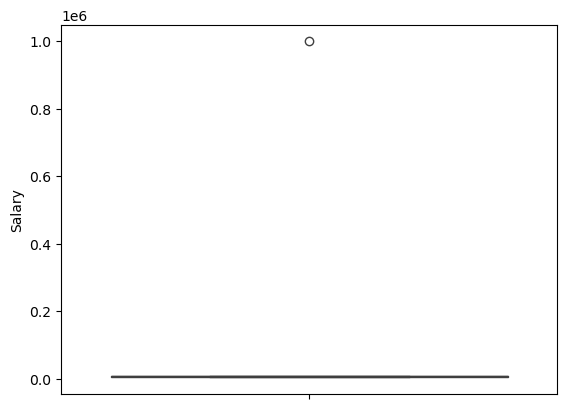

In [94]:
sns.boxplot(df['Salary'])
plt.show()

In [137]:
# BY IQR Method 

dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

outliers = []

def detect_outliers(dataset):
    threshold = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for i in dataset:
        z_score = (i-mean) / std
        if np.abs(z_score)  > threshold:
            outliers.append(i)
    
    return outliers 

detect_outliers(dataset)

[102, 107, 108]

In [147]:
# BY IQR Method 

dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

df1 = pd.DataFrame(dataset,columns=['Value'])

q1 = df1['Value'].quantile(0.25)
q3 = df1['Value'].quantile(0.75)

iqr = q3 - q1 

lower_fence = q1 - (1.5 * iqr)
higher_fence = q3 + (1.5 * iqr)

data = df1[(df1['Value'] >= lower_fence) & (df1['Value'] <= higher_fence)]

print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print("Higher Fence : {higher_fence}")
print(f"Lower_Fence {lower_fence}")
print(f"Data Without Outliers")
print(data['Value'].tolist())

Q1 : 12.0
Q3 : 15.0
IQR : 3.0
Higher Fence : {higher_fence}
Lower_Fence 7.5
Data Without Outliers
[11, 10, 12, 14, 12, 15, 14, 13, 15, 12, 14, 17, 19, 10, 13, 12, 14, 12, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]


In [150]:
# Filling missing value 
df

,Name,Salary
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,1000000


In [152]:
df['Salary'][3] = np.NaN

In [153]:
df

,Name,Salary
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,1000000.0


In [154]:
df.Salary.mean()

171666.66666666666

In [155]:
# Use Median 

df_new = df.fillna(df.Salary.median())
df_new

,Name,Salary
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,1000000.0
